# MILESTONES 1
=====================================================================================================================
  
Milestones 1  


Nama  : Lungun Ali Rusky Simbolon  
Batch : HCK-013  

Program ini adalah analisa data telemarketing dari sebuah bank di Portugal yang menawarkan produk deposito. 
  
  
URL Dashboard : https://public.tableau.com/app/profile/lungun.ali.rusky.simbolon/viz/Book1_17074103666380/Dashboard1?publish=yes  
  
Sumber Data :  
https://archive.ics.uci.edu/dataset/222/bank+marketing  
  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

=====================================================================================================================

# IDENTIFIKASI MASALAH

**SMART Goal**: Mengidentifikasi hubungan pendaftaran deposito dengan jenis pekerjaan.

**Specific**:
- Mengidentifikasi hubungan pendaftaran deposito dari beberapa kategori pekerjaan, dengan mengesampingkan metode promosinya untuk mengetahui apakah ada pengaruh dari pekerjaan yang berbeda terhadap pendaftaran deposito.

**Measurable**:
- Menghitung pendaftaran deposito untuk setiap kategori pekerjaan.

**Achievable**:
- Menggunakan metode statistik deskriptif dan inferensif untuk mengetahui apakah ada pengaruh dari tipe pekerjaan terhadap perilaku pendaftaran deposito

**Relevant**:
- Dengan menggunakan metode stastik dapat diketahui apakah ada hubungan antara jenis pekerjaan dengan perilaku pendaftaran deposito sehingga pihak bank dapat lebih terarah dalam melakukan promosi.

**Time-bound**:
- Analisa dalam 2 hari yang terdiri data preparation, analisa dan interpretasi

# DATA CLEANING

In [31]:
'''Loading tools yang dibutuhkan untuk analisa'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency

In [2]:
'''Import data dari csv'''

data = pd.read_csv('bank-full.csv', delimiter=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [22]:
'''Menampilkann informasi umum dari tabel yang sudah di impor'''
bank = data.copy()
bank.info()

#Tipe data sudah sesuai perkolomnya dan tidak ada missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
'''Memeriksa kolom yang bertipe string (kategorikal), apakah ada data yang tidak sesuai'''

#mengumpulkan kolom kategorikal kedalam 1 variabel untuk memudahkan pemrosesan
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

#mencari nilai unique dari masing-masing kolom 
for column in categorical_columns:
    unique_values = bank[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)

Unique values in 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in 'marital':
['married' 'single' 'divorced']
Unique values in 'education':
['tertiary' 'secondary' 'unknown' 'primary']
Unique values in 'default':
['no' 'yes']
Unique values in 'housing':
['yes' 'no']
Unique values in 'loan':
['no' 'yes']
Unique values in 'contact':
['unknown' 'cellular' 'telephone']
Unique values in 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in 'poutcome':
['unknown' 'failure' 'other' 'success']
Unique values in 'y':
['no' 'yes']


In [5]:
'''Berdasarkan hasil pengecekan unique valuenya, terdapat data yang harus dibersihkan yaitu value 'admin.' 
pada kolom job, dimana terdapat '.' didalamnya'''

#menghapus '.' dari data
bank['job'] = bank['job'].str.replace('.','') 

#mengecek kembali apakah '.' sudah dihilangkan dari kolom 'job'
bank['job'].unique()

C:\Users\asus\AppData\Local\Temp\ipykernel_29564\205611094.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bank['job'] = bank['job'].str.replace('.','')


array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [6]:
'''Menambahkan kolom y_encoded untuk membantu proses analisa, dimana isinya merupakan perubahan dari no dan yes menjadi 0 dan 1'''

data_bank = bank.copy()
data_bank['y_encoded'] = data_bank['y'].map({'yes': 1, 'no': 0})


In [21]:
'''Penambahan kolom age_group untuk mengelompokan usia'''

bins = [0, 18, 30, 40, 50, 60, 70, 100]  # Tentukan rentang usia
labels = ['<18', '18-30', '31-40', '41-50', '51-60', '61-70', '70+',]  # Tentukan label untuk setiap rentang usia

# mengelompokkan usia
data_bank['age_group'] = pd.cut(data_bank['age'], bins=bins, labels=labels, right=False)

data_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,51-60
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,41-50
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,31-40
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,41-50
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,31-40


# ANALISIS DAN PERHITUNGAN

**Visualisasi Data**

Total Data: 45211
Subscribing: 5289
Not Subscribing: 39922
Conversion Rate: 0.11698480458295547


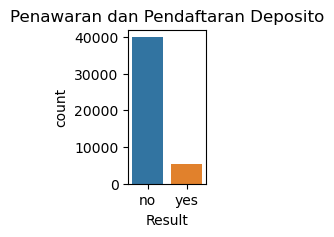

In [24]:
'''Memvisualisasikan rata-rata pendaftaran deposito berbanding dengan jumlah konsumen yang dihubungi'''

#membuat diagram batang
plt.figure(figsize=(1, 2))
sns.countplot(x=data_bank['y'])
plt.title('Penawaran dan Pendaftaran Deposito')
plt.xlabel('Result')

#menghitung rata-rata transaksi atau conversion rate secara total
count_yes = data_bank['y'].value_counts()['yes']
count_no = data_bank['y'].value_counts()['no']
total_data = count_yes+count_no
conversion_rate = (count_yes / total_data)

print('Total Data: {}'.format(total_data))
print('Subscribing: {}'.format(count_yes))
print('Not Subscribing: {}'.format(count_no))
print('Conversion Rate: {}'.format(conversion_rate))

Berdasarkan data dapat dilihat bahwa total penwaran produk deposito ada 45211 dan ada 5289 pendaftaran yang terjadi.
Rata-rata dari terjadinya transaksi adalah 0.11698480458295547 yang artinya setiap kali produk ditawarkan menghasilkan 0.11698480458295547 atau 11,7% transaksi.

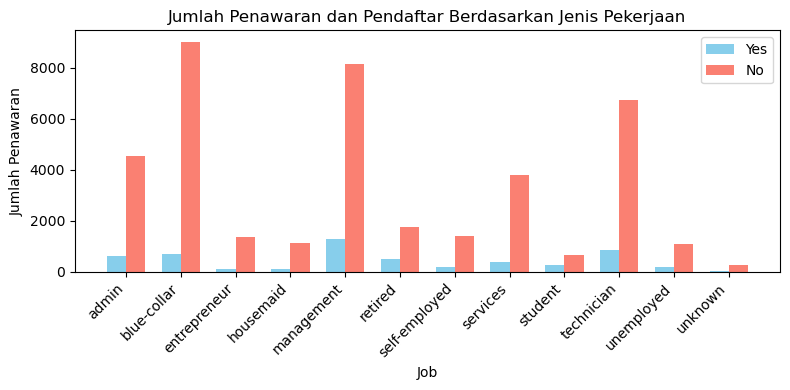

y                no   yes
job                      
admin          4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34


In [27]:
'''Membuat diagram batang yang menunjukkan hubungan jenis pekerjaan dan pendaftaran deposito'''

subscription_by_job = data_bank.groupby('job')['y'].value_counts().unstack(fill_value=0)
job_counts = data_bank.groupby(['job', 'y']).size().unstack().fillna(0)
plt.figure(figsize=(8, 4))
bar_width = 0.35
positions = np.arange(len(subscription_by_job))
plt.bar(positions - bar_width/2, subscription_by_job['yes'], bar_width, label='Yes', color='skyblue')
plt.bar(positions + bar_width/2, subscription_by_job['no'], bar_width, label='No', color='salmon')

plt.xlabel('Job')
plt.ylabel('Jumlah Penawaran')
plt.title('Jumlah Penawaran dan Pendaftar Berdasarkan Jenis Pekerjaan')
plt.xticks(positions, subscription_by_job.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

print(job_counts)


Pada data ini dapat dilihat bahwa penawaran terbanyak diberikan kepada customer yang bekerja sebagai buruh (blue collar) disusul dengan customer yang bekerja di level manajer dan teknisi.

Meskipun penawaran terbanyak ada di pekerja buruh namun yang paling banyak terjadi transaksi ada di kategori pekerja level manajer kemudian teknisi lalu buruh dan seterusnya.

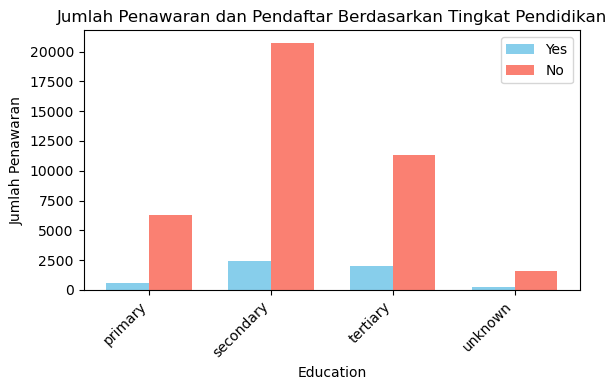

y             no   yes
education             
primary     6260   591
secondary  20752  2450
tertiary   11305  1996
unknown     1605   252


In [29]:
'''Membuat diagram batang yang menunjukkan hubungan tingkat pendidikan dan pendaftaran deposito'''

subscription_by_education = data_bank.groupby('education')['y'].value_counts().unstack(fill_value=0)
education_counts = data_bank.groupby(['education', 'y']).size().unstack().fillna(0)
plt.figure(figsize=(6, 4))
bar_width = 0.35
positions = np.arange(len(subscription_by_education))
plt.bar(positions - bar_width/2, subscription_by_education['yes'], bar_width, label='Yes', color='skyblue')
plt.bar(positions + bar_width/2, subscription_by_education['no'], bar_width, label='No', color='salmon')

plt.xlabel('Education')
plt.ylabel('Jumlah Penawaran')
plt.title('Jumlah Penawaran dan Pendaftar Berdasarkan Tingkat Pendidikan')
plt.xticks(positions, subscription_by_education.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

print(education_counts)


Berdasarkan data dapat dilihat bahwa penawaran terbanyak diberikan kepada customer dengan tingkat pendidikan 'secondary' atau tingkat menengah disusul 'tertiary' atau pendidikan tingkat tinggi dan tingkat dasar

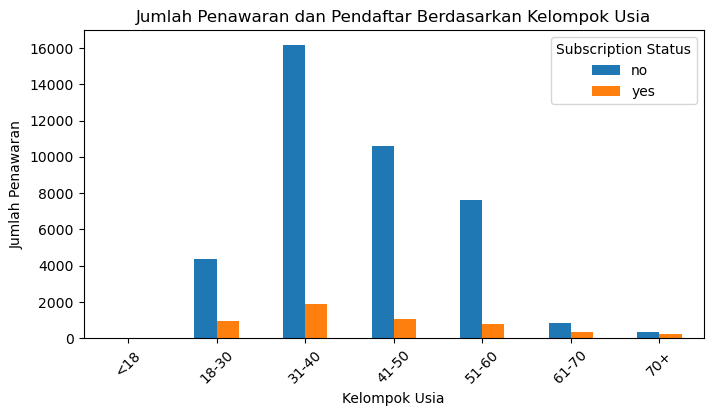

y             no   yes
age_group             
<18            0     0
18-30       4345   928
31-40      16176  1913
41-50      10592  1063
51-60       7625   785
61-70        865   365
70+          319   235


In [30]:
'''Membuat diagram batang yang menunjukkan hubungan kelompok usia dan pendaftaran deposito'''

subscription_by_age_group = data_bank.groupby(['age_group', 'y']).size().unstack(fill_value=0)
subscription_by_age_group.plot(kind='bar', stacked=False, figsize=(8, 4))
group_age_counts = data_bank.groupby(['age_group', 'y']).size().unstack().fillna(0)

plt.title('Jumlah Penawaran dan Pendaftar Berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Penawaran')
plt.xticks(rotation=45)
plt.legend(title='Subscription Status')
plt.show()

print(group_age_counts)


Berdasarkan grafik dapat dilihat bahwa penawaran terbanyak diberikan kepada kelompok usia 31-40 tahun dan jumlah transaksi terbanyak juga ada di kelompok usia ini.

**Statistik Deskriptif**

In [20]:
# Analisis Deskriptif untuk Variabel Numerik
numeric_stats = data_bank[['age', 'balance']].describe()
numeric_stats

# Analisis Frekuensi dan Proporsi untuk Variabel Kategorikal
categorical_stats = data_bank[['job', 'marital', 'education', 'y']].apply(pd.Series.value_counts)
categorical_stats['proportion'] = categorical_stats['y'] / data_bank.shape[0] * 100

print("Statistik Deskriptif untuk Variabel Numerik:")
print(numeric_stats)
print("\nAnalisis Frekuensi dan Proporsi untuk Variabel Kategorikal:")
print(categorical_stats)


Statistik Deskriptif untuk Variabel Numerik:
                age        balance
count  45211.000000   45211.000000
mean      40.936210    1362.272058
std       10.618762    3044.765829
min       18.000000   -8019.000000
25%       33.000000      72.000000
50%       39.000000     448.000000
75%       48.000000    1428.000000
max       95.000000  102127.000000

Analisis Frekuensi dan Proporsi untuk Variabel Kategorikal:
                  job  marital  education        y  proportion
admin          5171.0      NaN        NaN      NaN         NaN
blue-collar    9732.0      NaN        NaN      NaN         NaN
divorced          NaN   5207.0        NaN      NaN         NaN
entrepreneur   1487.0      NaN        NaN      NaN         NaN
housemaid      1240.0      NaN        NaN      NaN         NaN
management     9458.0      NaN        NaN      NaN         NaN
married           NaN  27214.0        NaN      NaN         NaN
no                NaN      NaN        NaN  39922.0    88.30152
primary     

**Penjelasan Statistik Deskriptif untuk Variabel Numerik:**

Berdasarkan perhitungan diketahui bahwa variabel numerik 'age' (usia customer) dan 'balance' (rata-rata saldo tahunan di rekeningnya) memiliki informasi sebagai berikut :

- terdapat 45.211 baris data  
- rata-rata usia nasabah adalah  40.936210 tahun, usia termuda ada di 18 tahun dan tertua ada di 95 tahun  
- rata-rata saldo nasabah adalah 1362.272058 euro dimana saldo terbesarnya adalah 102127 euro dan terendah di -8019 euro  
  
**Penjelasan Analisis Frekuensi dan Proporsi untuk Variabel Kategorikal:**

Terdapat juga frekuensi dari tiap jenis pekerjaan, pendidikan dan status pernikahan sebagai berikut :
  
Pekerjaan :  
admin         : 5171.0  
blue-collar   : 9732.0  
entrepreneur  : 1487.0  
dst  
  
Pendidikan :  
primary       : 6851.0  
secondary     : 23202.0  
tertiary      : 13301.0  
  
Status Pernikahan :  
divorced      : 5207.0   
married       : 27214.0  
single        : 12790.0  

**Statistik Inferensial**

In [13]:
'''Uji Chi-Square untuk Hubungan Antara Variabel Kategorikal'''
crosstab = pd.crosstab(data_bank['job'], data_bank['y'])
chi2, p, dof, expected = chi2_contingency(crosstab)

# Interpretasi hasil uji chi-square
if p < 0.05:
    chi2_result = "Hubungan signifikan antara pekerjaan dan pembelian deposito"
else:
    chi2_result = "Tidak ada hubungan signifikan antara pekerjaan dan pembelian deposito"

# Output hasil analisis
print("\nHasil Uji Chi-Square:")
print("Chi-square:", chi2)
print("p-value:", p)
print("Interpretasi:", chi2_result)


Hasil Uji Chi-Square:
Chi-square: 836.1054877471965
p-value: 3.337121944935502e-172
Interpretasi: Hubungan signifikan antara pekerjaan dan pembelian deposito


**Hasil Uji Chi-Square:**  

Uji chi-square dilakukan untuk menguji hubungan antara jenis pekerjaan ("job") dan pembelian deposito ("y").
- Nilai chi-square yang dihasilkan adalah 836.105, dengan nilai p sebesar 3.337e-172, dimana semakin besar nilai chi-square menunjukkan semakin signifikan hubungan antara dua variabel yang diujikan dan semakin kecil nilai p menunjukkan semakin signifikan juga hubungan antara dua variabel tersebut

- Interpretasi hasil adalah bahwa terdapat hubungan yang signifikan antara pekerjaan dan pembelian deposito, yang berarti jenis pekerjaan seseorang dapat mempengaruhi keputusan mereka untuk membeli deposito.

# KESIMPULAN

Berdasarkan hasil analisa yang telah dilakukan, berikut adalah kesimpulan yang dapat diambil :

Berdasarkan frekuensi pendaftaran deposito untuk setiap jenis pekerjaan didapati bahwa 
penawaran oleh bank ditujukan kepada nasabah dengan pekerjaan 'blue-collar' dimana frekuensinya sebesar 9732 orang disusul dengan pekerjaan 'management' dengan 9458 orang. Untuk tingkat pendaftaran tertinggi ada di pekerjaan 'management' dengan 1301 orang pendaftar.  

Untuk mengetahui menentukan apakah terdapat hubungan yang signifikan antara jenis pekerjaan dan pendaftaran deposito maka dilakukan perhitungan enggunakan uji statistik seperti uji Chi-square. Uji Chi-Square digunakan karena data yang ingin dibandingkan bertipe kategorikal yaitu jenis pekerjaan dan pendaftara deposito.  

Berdasarkan hasil perhitungan didapatkan hasil :
Chi-square: 836.1054877471965
p-value: 3.337121944935502e-172
Kesimpulan: Ada hubungan signifikan antara pekerjaan dan pembelian deposito

Jika dilihat dari kesimpulan tersebut dan dihubungkan dengan jumlah pendaftar deposito maka ada kecenderungan nasabah dengan pekerjan 'management' atau sejenisnya untuk mendaftar produk deposito di bank karena terlihat dari jumlah pendaftarnya paling besar jika dibandingkan dengan pekerjaan lainnya yaitu sebesar 1301 orang. Berdasarkan kesimpulamn ini maka promosi untuk produk deposito dapat diarahkan kepada nasabah dengan jenis pekerjan 'management' atau sejenisnya.
